# **Import Library**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

#set warning
import warnings
warnings.filterwarnings('ignore')


pd.pandas.set_option('display.max_columns', None)

In [2]:
filename = "reviewHotelJogja.csv"
# filename = "allReview.csv"
df = pd.read_csv(filename, encoding = 'latin-1')
df.head()

,Hotel_name,name,rating,review
0,The Phoenix Hotel Yogyakarta - Handwritten Col...,Jim D,5.0,This is a fantastic hotel and a wonderful intr...
1,The Phoenix Hotel Yogyakarta - Handwritten Col...,Maja G,4.0,We spent 2 nights there with our 2 boys (age 1...
2,The Phoenix Hotel Yogyakarta - Handwritten Col...,Susan S,5.0,"Beautiful old hotel, with many special touches..."
3,The Phoenix Hotel Yogyakarta - Handwritten Col...,Jan-Markus H,4.0,If you like mix of colonial with Indonesian fl...
4,The Phoenix Hotel Yogyakarta - Handwritten Col...,Md Aman,3.0,Heritage hotel located near the Yogyakarta Mon...


In [3]:
df.drop(columns = ['Hotel_name', 'name'], inplace = True)
df.columns = ['Rating', 'Review']
df.head()

,Rating,Review
0,5.0,This is a fantastic hotel and a wonderful intr...
1,4.0,We spent 2 nights there with our 2 boys (age 1...
2,5.0,"Beautiful old hotel, with many special touches..."
3,4.0,If you like mix of colonial with Indonesian fl...
4,3.0,Heritage hotel located near the Yogyakarta Mon...


# **Preprocessing Data**


<h2>Cleaning the text</h2>

In [4]:
import string
import re

In [5]:
def clean_text(text):
    return re.sub('[^a-zA-Z]', ' ', text).lower()
df['cleaned_text'] = df['Review'].apply(lambda x: clean_text(x))

def map_rating_to_label(rating):
    if 1.0 <= rating <= 3.0:
        return 0
    elif 3.1 <= rating <= 5.0:
        return 1
    else:
        return None  # Jika ada rating di luar rentang yang diharapkan

df['label'] = df['Rating'].apply(map_rating_to_label)
df.head()

,Rating,Review,cleaned_text,label
0,5.0,This is a fantastic hotel and a wonderful intr...,this is a fantastic hotel and a wonderful intr...,1
1,4.0,We spent 2 nights there with our 2 boys (age 1...,we spent nights there with our boys age ...,1
2,5.0,"Beautiful old hotel, with many special touches...",beautiful old hotel with many special touches...,1
3,4.0,If you like mix of colonial with Indonesian fl...,if you like mix of colonial with indonesian fl...,1
4,3.0,Heritage hotel located near the Yogyakarta Mon...,heritage hotel located near the yogyakarta mon...,0


<h2>Adding additional features - length of, and percentage of punctuations in the text</h2>

In [6]:
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100
df['Review_len'] = df['Review'].apply(lambda x: len(x) - x.count(" "))
df['punct'] = df['Review'].apply(lambda x: count_punct(x))
df.head()

,Rating,Review,cleaned_text,label,Review_len,punct
0,5.0,This is a fantastic hotel and a wonderful intr...,this is a fantastic hotel and a wonderful intr...,1,539,2.6
1,4.0,We spent 2 nights there with our 2 boys (age 1...,we spent nights there with our boys age ...,1,592,3.0
2,5.0,"Beautiful old hotel, with many special touches...",beautiful old hotel with many special touches...,1,213,4.7
3,4.0,If you like mix of colonial with Indonesian fl...,if you like mix of colonial with indonesian fl...,1,324,3.4
4,3.0,Heritage hotel located near the Yogyakarta Mon...,heritage hotel located near the yogyakarta mon...,0,399,1.8


<h2>Tokenization</h2>

In [7]:
def tokenize_text(text):
    tokenized_text = text.split()
    return tokenized_text
df['tokens'] = df['cleaned_text'].apply(lambda x: tokenize_text(x))
df.head()

,Rating,Review,cleaned_text,label,Review_len,punct,tokens
0,5.0,This is a fantastic hotel and a wonderful intr...,this is a fantastic hotel and a wonderful intr...,1,539,2.6,"[this, is, a, fantastic, hotel, and, a, wonder..."
1,4.0,We spent 2 nights there with our 2 boys (age 1...,we spent nights there with our boys age ...,1,592,3.0,"[we, spent, nights, there, with, our, boys, ag..."
2,5.0,"Beautiful old hotel, with many special touches...",beautiful old hotel with many special touches...,1,213,4.7,"[beautiful, old, hotel, with, many, special, t..."
3,4.0,If you like mix of colonial with Indonesian fl...,if you like mix of colonial with indonesian fl...,1,324,3.4,"[if, you, like, mix, of, colonial, with, indon..."
4,3.0,Heritage hotel located near the Yogyakarta Mon...,heritage hotel located near the yogyakarta mon...,0,399,1.8,"[heritage, hotel, located, near, the, yogyakar..."


<h2>Lemmatization and Removing Stopwords</h2>

In [8]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
def lemmatize_text(token_list):
    return " ".join([lemmatizer.lemmatize(token) for token in token_list if not token in set(all_stopwords)])

lemmatizer = nltk.stem.WordNetLemmatizer()
df['lemmatized_review'] = df['tokens'].apply(lambda x: lemmatize_text(x))
df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,Rating,Review,cleaned_text,label,Review_len,punct,tokens,lemmatized_review
0,5.0,This is a fantastic hotel and a wonderful intr...,this is a fantastic hotel and a wonderful intr...,1,539,2.6,"[this, is, a, fantastic, hotel, and, a, wonder...",fantastic hotel wonderful introduction indones...
1,4.0,We spent 2 nights there with our 2 boys (age 1...,we spent nights there with our boys age ...,1,592,3.0,"[we, spent, nights, there, with, our, boys, ag...",spent night boy age staff brilliant service be...
2,5.0,"Beautiful old hotel, with many special touches...",beautiful old hotel with many special touches...,1,213,4.7,"[beautiful, old, hotel, with, many, special, t...",beautiful old hotel many special touch suite l...
3,4.0,If you like mix of colonial with Indonesian fl...,if you like mix of colonial with indonesian fl...,1,324,3.4,"[if, you, like, mix, of, colonial, with, indon...",like mix colonial indonesian flavor hotel hote...
4,3.0,Heritage hotel located near the Yogyakarta Mon...,heritage hotel located near the yogyakarta mon...,0,399,1.8,"[heritage, hotel, located, near, the, yogyakar...",heritage hotel located near yogyakarta monumen...


# **EDA**

In [10]:
#Shape of the dataset, and breakdown of the classes
print(f"Input data has {len(df)} rows and {len(df.columns)} columns")
print(f"rating 1.0 = {len(df[df['Rating']==1.0])} rows")
print(f"rating 2.0 = {len(df[df['Rating']==2.0])} rows")
print(f"rating 3.0 = {len(df[df['Rating']==3.0])} rows")
print(f"rating 4.0 = {len(df[df['Rating']==4.0])} rows")
print(f"rating 5.0 = {len(df[df['Rating']==5.0])} rows")

Input data has 210 rows and 8 columns
rating 1.0 = 5 rows
rating 2.0 = 5 rows
rating 3.0 = 11 rows
rating 4.0 = 33 rows
rating 5.0 = 131 rows


Number of null in label: 0
Number of null in text: 0


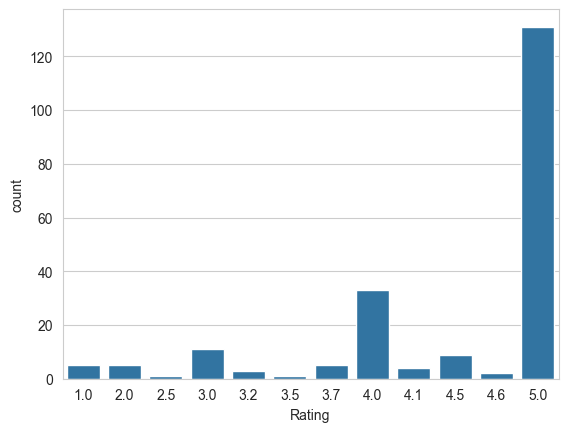

In [11]:
# Missing values in the dataset
print(f"Number of null in label: { df['Rating'].isnull().sum() }")
print(f"Number of null in text: { df['Review'].isnull().sum()}")
sns.countplot(x='Rating', data=df);

# **Visualizing Word Clouds**

In [12]:
from wordcloud import WordCloud

In [13]:
df_negative = df[ (df['Rating']==1.0) | (df['Rating']==2.0) | (df['Rating']==3.0)]
df_positive = df[ (df['Rating']==4.0) | (df['Rating']==5.0)]
#convert to list
negative_list=df_negative['lemmatized_review'].tolist()
positive_list= df_positive['lemmatized_review'].tolist()

filtered_negative = ("").join(str(negative_list)) #convert the list into a string of spam
filtered_negative = filtered_negative.lower()

filtered_positive = ("").join(str(positive_list)) #convert the list into a string of ham
filtered_positive = filtered_positive.lower()

<h3><b>Word Cloud</b>: Positive Reviews</h3>

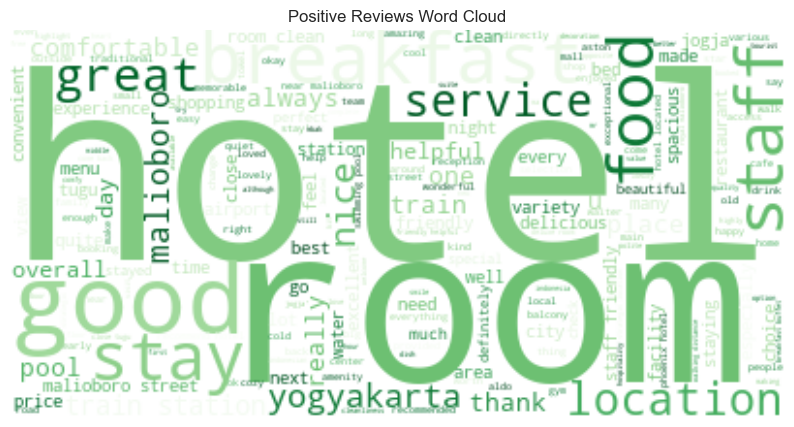

In [14]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Greens").generate(filtered_positive)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Positive Reviews Word Cloud")
plt.show()

<h3><b>Word Cloud</b>: Negative Reviews</h3>

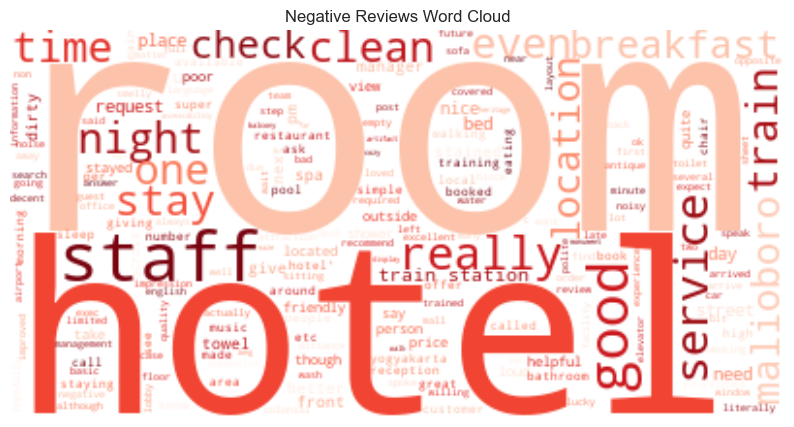

In [15]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Reds").generate(filtered_negative)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Negative Reviews Word Cloud")
plt.show()

# **Feature Extraction from Text**

*   Vectorizer : TF-IDF

In [16]:
X = df[['lemmatized_review', 'Review_len', 'punct']]
y = df['label']
print(X.shape)
print(y.shape)

(210, 3)
(210,)


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(147, 3)
(63, 3)
(147,)
(63,)


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df = 0.5, min_df = 2) # ignore terms that occur in more than 50% documents and the ones that occur in less than 2
tfidf_train = tfidf.fit_transform(X_train['lemmatized_review'])
tfidf_test = tfidf.transform(X_test['lemmatized_review'])

X_train_vect = pd.concat([X_train[['Review_len', 'punct']].reset_index(drop=True),
           pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['Review_len', 'punct']].reset_index(drop=True),
           pd.DataFrame(tfidf_test.toarray())], axis=1)

X_train_vect.head()

,Review_len,punct,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652
0,116,1.7,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.26161,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.149691,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.354118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.38826,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.154796,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0

# **Predictions**








---

*   <u>Vectorizer</u>: TF-IDF
*   <u>Algoritma</u>: Extra Trees Classifier

In [19]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 10)
# from sklearn.ensemble import ExtraTreesClassifier
# classifier = ExtraTreesClassifier(n_estimators=150, random_state=50)

classifier.fit(tfidf_train, y_train)
classifier.score(tfidf_test, y_test)

0.8571428571428571

In [20]:
data = ["the hotel is really enjoy", "Good", "I hate the service, it's really bad", "The nurse is so kind"]
vect = tfidf.transform(data).toarray()

my_pred = classifier.predict(vect)
print(my_pred)

[1 1 1 1]
